In [1]:
import pickle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import imageio
import os
import io
import numpy as np

In [2]:
#---Georges Bank
min_lon = -71.5
min_lat = 38
max_lon = -65
max_lat = 42.5

In [3]:
band07_path = "band07_data/20230907/"

date = '2023_09_07'

filename = 'goes_e_band07_'+date+'_00H_00M'

datetime = filename[14:]

In [4]:
file = open(band07_path+filename, 'rb')
BT = pickle.load(file)
file.close()

In [5]:
BT_c = BT.where((BT.lat>min_lat) & (BT.lat<max_lat) & (BT.lon>min_lon) & (BT.lon<max_lon))
BT_c = BT_c.dropna(dim="y", how="all")
BT_c = BT_c.dropna(dim="x", how="all")

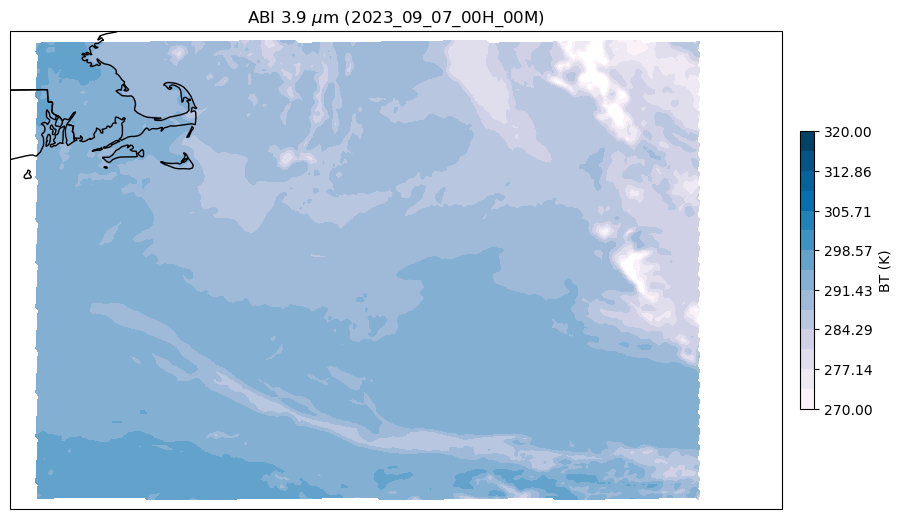

In [6]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.PuBu
levels=np.linspace(270, 320, 15)

c=ax.contourf(BT_c.lon, BT_c.lat, BT_c[0], cmap=cmap, levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('ABI 3.9 $\mu$m ('+datetime+')')
clb.set_label('BT (K)')

ax.add_feature(cfeature.STATES)

In [ ]:
def create_frame(filename):
    
    #---Open Band 07 file
    file = open(band07_path+filename, 'rb')
    BT = pickle.load(file)
    file.close()
    
    #---Crop image to the region of interest
    BT_c = BT.where((BT.lat>min_lat) & (BT.lat<max_lat) & (BT.lon>min_lon) & (BT.lon<max_lon))
    BT_c = BT_c.dropna(dim="y", how="all")
    BT_c = BT_c.dropna(dim="x", how="all")
    
    #---Create figure for timestamp
    projection=ccrs.PlateCarree()
    fig,ax=plt.subplots(1, figsize=(12,6),subplot_kw={'projection': projection})
    cmap = plt.cm.PuBu
    
    c=ax.contourf(BT_c.lon, BT_c.lat, BT_c[0], cmap=cmap, levels=levels)
    clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
    datetime = filename[12:]
    ax.set_title('ABI 3.9 $\mu$m ('+datetime+')')
    clb.set_label('BT (K)')
    ax.add_feature(cfeature.STATES)
    
    # Save the current figure to a BytesIO buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    # Read the BytesIO buffer and return as an image
    frame = imageio.imread(buf)

    # Clear the current figure to avoid overlapping plots
    plt.clf()

    return frame

In [ ]:
file_list = os.listdir(band07_path)
file_list.sort()

anim_list = []

for filename in file_list:
    
    if filename[0:26] == 'goes_e_band07_'+date+'_0':
        anim_list += [filename]

In [ ]:
anim_list

In [ ]:
frames = []
for filename in anim_list:
    frame = create_frame(filename)
    frames.append(frame)

In [ ]:
imageio.mimsave('band07_'+band07_path[12:20]+'.gif', frames, loop=0, duration=100)